In [1]:
import pandas as pd
import numpy as np 
from pandas import Series, DataFrame

In [2]:
data = pd.read_csv('train.csv', index_col = "PassengerId")

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.drop?

Вырежем все, что не нужно для дальнешйего анализа - колонки "Ticket" и "Name" 

In [7]:
data.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [9]:
for column_name in data.columns:
    print(column_name, 'null', data[column_name].isnull().sum())

Survived null 0
Pclass null 0
Sex null 0
Age null 177
SibSp null 0
Parch null 0
Fare null 0
Cabin null 687
Embarked null 2


Обработка пропущенных значений, которых много

In [10]:
data.drop("Cabin", axis = 1, inplace = True)

In [11]:
print(data["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


Замена двух пропущенных значений в колонке "Embarked" на "S" (???)

In [12]:
data["Embarked"] = data["Embarked"].fillna("S")

In [13]:
print(data["Embarked"].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


Все ОкЭй :)

# Задание 1

1. Найдем среднее значение и стандартное отклонение параметра "age" для пассажиров разных классов

In [14]:
data.groupby("Pclass").mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [15]:
data.groupby("Pclass").std()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.484026,14.802856,0.611898,0.693997,78.380373
2,0.500623,14.001077,0.601633,0.690963,13.417399
3,0.428949,12.495398,1.374883,0.888861,11.778142


2. В каком порту количество мужчин и женщин больше всего отличалось (абсолютное значение)?

In [16]:
data.groupby(["Embarked", "Sex"]).count()

Survived  Pclass  Age  SibSp  Parch  Fare
Embarked Sex                                              
C        female        73      73   61     73     73    73
         male          95      95   69     95     95    95
Q        female        36      36   12     36     36    36
         male          41      41   16     41     41    41
S        female       205     205  188    205    205   205
         male         441     441  368    441    441   441

Из таблицы видно, что наибольшая разница в порту "S"

3. Количество пропущенных значений (NaN) в каждой колонке

In [17]:
len(data) - data.count()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Больше всего пропущенных значений имеет переменная "Age"

4. Сделать замену "NaN" на медианное значение показателя

In [18]:
median_age = data["Age"].median()

In [19]:
median_age

28.0

In [20]:
data["Age"] = data["Age"].fillna(median_age)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


# Задание 2. Построение графиков распределений

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

Начнем с чего-то простого: посмотрим на распределение возраста и тарифа

Text(0, 0.5, 'Тариф')

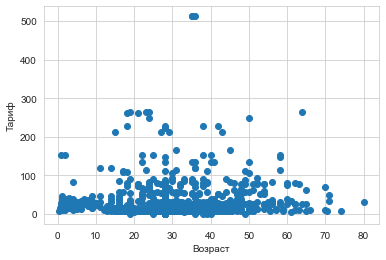

In [23]:
x = data["Age"]
y = data["Fare"]
plt.plot(x,y, 'o')
plt.xlabel('Возраст')
plt.ylabel('Тариф')

Посмотрим на долю пассажиров (с учетом неопределенности) в зависимости от места

<AxesSubplot:xlabel='count', ylabel='Survived'>

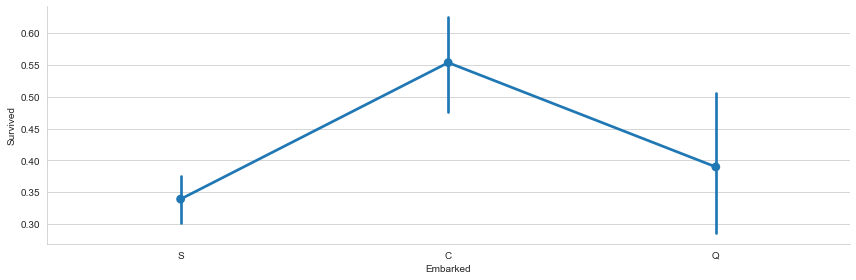

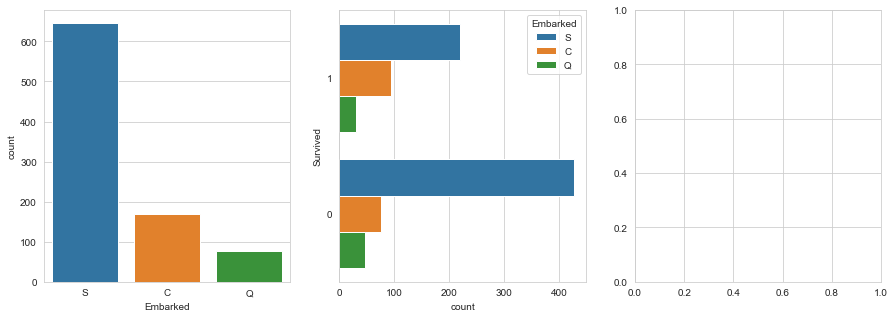

In [24]:
sns.catplot(x = "Embarked", y = "Survived", data = data, height = 4, aspect = 3, kind = 'point')
figure_handle, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (15,5))
sns.countplot(x = "Embarked", data = data, ax = axis1)
sns.countplot(y = "Survived", hue = "Embarked", data = data, order = [1,0], ax = axis2)

А теперь посмотрим на средние значения 

In [25]:
sns.barplot(x = "Embarked", y = "Survived", data = data[["Embarked", "Survived"]], order = ["S", "C", "Q"], ax = axis3)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

Сделаем бинарные переменные для параметра "Embarked", если мы хотим сделать прогноз (например, логит)

In [26]:
embarked_dummies_data = pd.get_dummies(data["Embarked"])

In [27]:
embarked_dummies_data

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [28]:
embarked_dummies_data.drop(['S'], axis =1, inplace = True)

In [29]:
data = data.join(embarked_dummies_data)

In [30]:
data.drop(["Embarked"], axis =1, inplace = True)

Сделаем преобразование с переменной "Fare": переведем из класса float в класс int

In [31]:
data["Fare"] = data["Fare"].astype(int)

Посмотрим на тариф для выживших и нет пассажиров. Если пассажир выжил, то будет соответствовать 1. В противном случае - 0.

In [32]:
fare_not_survived = data["Fare"][data["Survived"] == 0]
fare_survived = data["Fare"][data["Survived"] == 1]

Найдем среднее значение и стандартное отклонение выживших и нет пассажиров

In [33]:
average_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived. std(), fare_survived.std()])

Построим соответствующий график

<AxesSubplot:xlabel='Survived'>

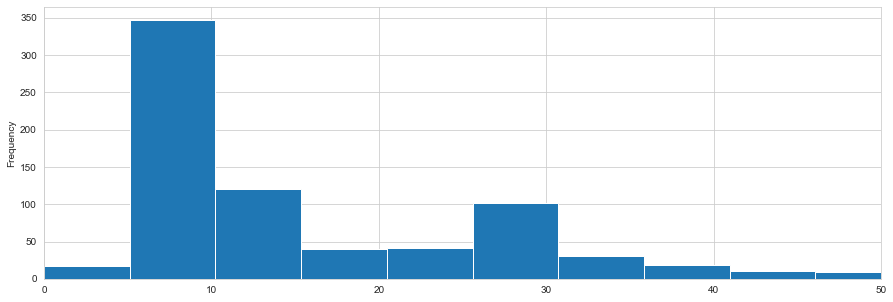

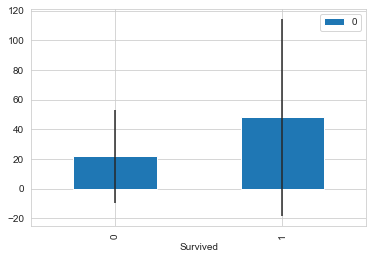

In [34]:
data["Fare"].plot(kind = 'hist', figsize = (15,5), bins = 100, xlim = (0,50))

std_fare.index.names = ["Survived"]
average_fare.index.names = ["Survived"]
average_fare.plot(yerr=std_fare, kind = 'bar', legend = 'False')

In [36]:
print(data[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True))

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

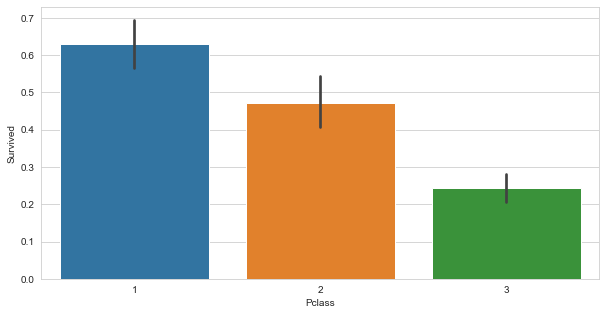

In [37]:
plt.figure(figsize = [10,5])
sns.barplot(x="Pclass", y = "Survived", data = data[["Pclass", "Survived"]], order = [1,2,3])

Text(0.5, 1.0, 'Новые значения возраста')

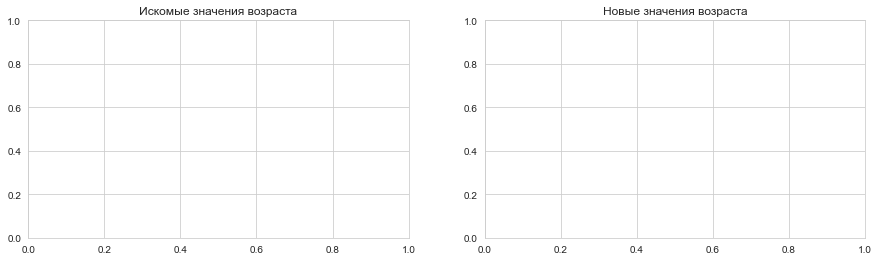

In [40]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize = (15,4))
axis1.set_title("Искомые значения возраста")
axis2.set_title("Новые значения возраста")

Найдем среднее значение ($\nu$), стандартное отклонение ($\sigma$)

In [46]:
average_age_titanic = data["Age"].mean()
std_age_titanic = data["Age"].std()
count_nan_age_titanic = data["Age"].isnull().sum()

Создадим искусственные переменные, которые будут определяться как: ($\nu$ - $\sigma$)$\times$ ($\nu$ + $\sigma$)

In [47]:
random_ages = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

Построим график распределения возраста до преобразования

In [49]:
data.loc[np.isnan(data["Age"]), "Age"] = random_ages

Преобразование переменных с плавающей точкой в целочисленные 

In [50]:
data["Age"] = data["Age"].astype(int)

Рассмотрим распределение выживших и нет в зависимости от возраста

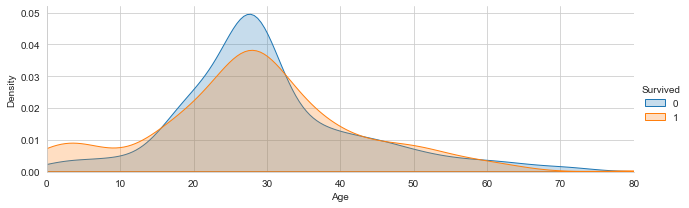

In [52]:
facet = sns.FacetGrid(data, hue = "Survived", aspect = 3)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, data["Age"].max()))
facet.add_legend()

Средний возраст выивших пассажиров

<AxesSubplot:xlabel='Age', ylabel='Survived'>

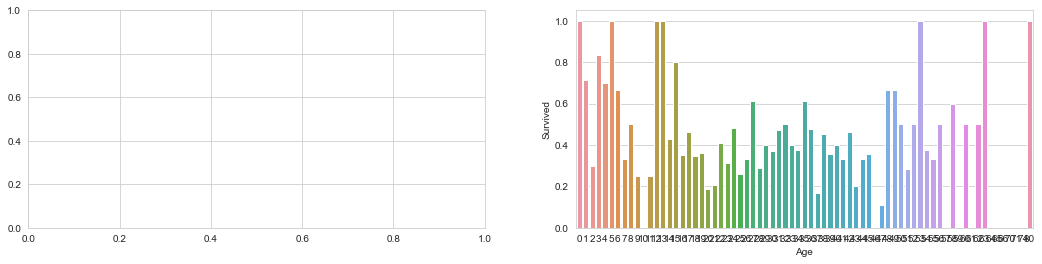

In [57]:
figure_handle, axis1 = plt.subplots(1,2, figsize = (18,4))
average_age = data[["Age", "Survived"]].groupby(["Age"], as_index = False).mean()
sns.barplot(x = "Age", y = "Survived", data = average_age)

Рассмотрим случай, когда пассажир был один или с кем-то. Следовательно, возможна гипотеза: влияет ли наличие родственника на выживание

In [58]:
data["Family"] = data["Parch"] + data["SibSp"]
data.loc[data["Family"] > 0, "Family"] = 1
data.loc[data["Family"] == 0, "Family"] = 0

Соединим между собой

In [59]:
data.drop(["SibSp", "Parch"], axis = 1, inplace = True)

Нарисуем графики

<AxesSubplot:xlabel='Family', ylabel='Survived'>

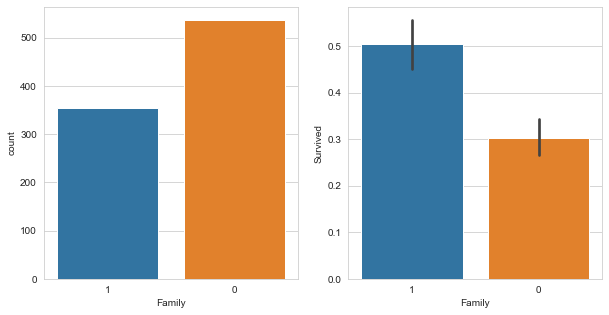

In [61]:
figure_handle, (axis1, axis2) = plt.subplots(1,2, sharex = True, figsize = (10,5))
sns.countplot(x = "Family", data = data, order = [1,0], ax = axis1)
axis1.set_xticklabels(["С семьей", "Одинчкой"], rotation = 0)

sns.barplot(x = "Family", y = "Survived", data = data[["Family", "Survived"]], order = [1,0], ax = axis2)

Классифицируем пассажиров в заивисимости от пола: мужчины, женщины и дети

In [62]:
def get_person(passenger):
    age, sex = passenger
    return "child" if age < 16 else sex

data["Person"] = data[["Age", "Sex"]].apply(get_person, axis = 1)

Введем бинарные переменные и уберем мужчин, так как их численность наименьшая среди выживших

In [63]:
person_dummies_titanic = pd.get_dummies(data["Person"])
person_dummies_titanic.columns = ["Child", "Female", "Male"]
person_dummies_titanic.drop(["Male"], axis = 1, inplace = True)

In [64]:
data = data.join(person_dummies_titanic)

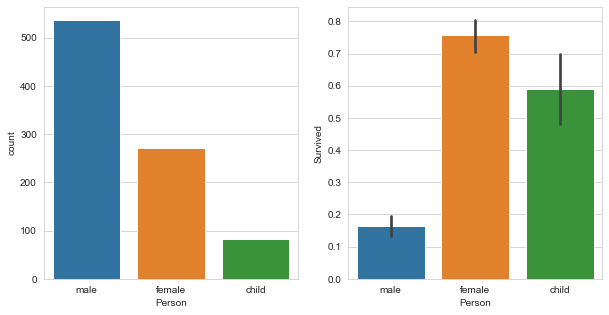

In [66]:
figure_handle, (axis1, axis2) = plt.subplots(1,2, figsize = (10,5))
sns.countplot(x = "Person", data = data, ax = axis1)

sns.barplot(x = "Person", y = "Survived", data = data[["Person", "Survived"]], ax = axis2, order = ["male", "female", "child"])
data.drop(["Person"], axis=1, inplace = True)

Теперь рассмотрим Fclass и уберем третий класс 

/Users/anastasia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


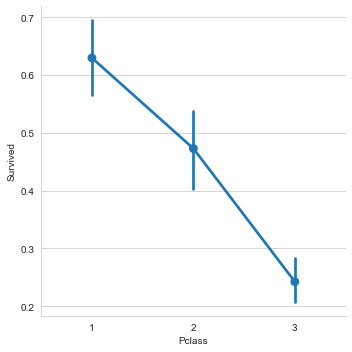

In [67]:
sns.catplot("Pclass", "Survived", order = [1,2,3], data = data, height = 5, kind = "point")
pclass_dummies_titanic = pd.get_dummies(data["Pclass"])
pclass_dummies_titanic.columns = ["Class_1", "Class_2", "Class_3"]
pclass_dummies_titanic.drop(["Class_3"], axis =1, inplace = True)
data = data.join(pclass_dummies_titanic)

# Задание 3. 

1. Верно ли, что распределение по возарсту у мужчин и женщин одинаковое?

<AxesSubplot:title={'center':'Женщины'}>

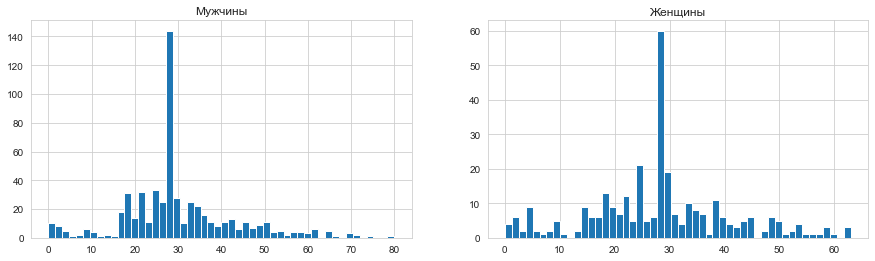

In [69]:
gender_titanic1 = data[data.Sex == "male"]
gender_titanic2 = data[data.Sex == "female"]

fig, (axis1, axis2) = plt.subplots(1,2, figsize = (15,4))

axis1.set_title("Мужчины")
axis2.set_title("Женщины")

gender_titanic1["Age"].hist(ax = axis1, bins = 50)
gender_titanic2["Age"].hist(ax = axis2, bins = 50)

2. Сравнить возраст в разных классах

In [70]:
data.groupby("Pclass")

<AxesSubplot:title={'center':'Возраст в третьем классе'}>

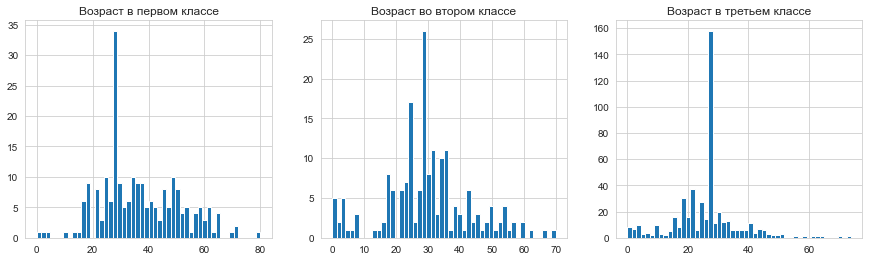

In [72]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (15,4))
axis1.set_title("Возраст в первом классе")
axis2.set_title("Возраст во втором классе")
axis3.set_title("Возраст в третьем классе")

pclass_titanic = data[data.Pclass == 1]
pclass_titanic["Age"].hist(ax = axis1, bins = 50)

pclass_titanic = data[data.Pclass == 2]
pclass_titanic["Age"].hist(ax = axis2, bins = 50)

pclass_titanic = data[data.Pclass == 3]
pclass_titanic["Age"].hist(ax = axis3, bins = 50)

# Задание 4. ML

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [75]:
data.drop("Sex", axis = 1, inplace = True)

Сделаем разделение на обучающуся и тренировочную выборку

In [76]:
train, test = train_test_split(data, train_size = 0.7, test_size = 0.3)

In [78]:
train_x = train.drop(["Survived"], axis = 1)
train_y = train["Survived"]
test_x = test.drop(["Survived"], axis = 1)
test_y = test["Survived"]

Построим логистическую регрессию и посчитаем вероятность выживания

In [79]:
logistic_regression_model = LogisticRegression(solver = 'liblinear')
logistic_regression_model.fit(train_x, train_y)
train_prediction = logistic_regression_model.predict(train_x)
test_prediction = logistic_regression_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print("Accuracy на обучении", train_accuracy)
print("Accuracy на тесте", test_accuracy)

Accuracy на обучении 0.7961476725521669
Accuracy на тесте 0.832089552238806


Посмотрим на корреляционную диаграмму

In [82]:
coef_df = DataFrame(data.columns.delete(0))
coef_df.columns = ["Features"]
coef_df["Coefficient Estimate"] = pd.Series(logistic_regression_model.coef_[0])

coef_df

,Features,Coefficient Estimate
0,Pclass,-0.719985
1,Age,-0.022327
2,Fare,0.000710
3,C,0.475403
4,Q,0.223905
5,Family,-0.108430
6,Child,1.725975
7,Female,2.589956
8,Class_1,0.667226
9,Class_2,0.547614


Воспользуемся методом опорных векторов (SVM)

In [83]:
svm_model = SVC(C = 1.0, gamma = 0.5)
svm_model. fit(train_x, train_y)
train_prediction = svm_model.predict(train_x)
test_prediction = svm_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print("Accuracy на тренировочной", train_accuracy)
print("Accuracy на тесте", test_accuracy)

Accuracy на тренировочной 0.9486356340288925
Accuracy на тесте 0.7089552238805971


Метод случайного леса

In [84]:
random_forest_model = RandomForestClassifier(n_estimators = 10)
random_forest_model.fit(train_x, train_y)

train_prediction = random_forest_model.predict(train_x)
test_prediction = random_forest_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print("Accuracy на тренировочной", train_accuracy)
print("Accuracy на тестовой", test_accuracy)

Accuracy на тренировочной 0.9534510433386838
Accuracy на тестовой 0.8432835820895522


Метод ближайщих соседей (KNN)

In [87]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(train_x, train_y)
train_prediction = knn_model.predict(train_x)
test_prediction = knn_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print("Accuracy на тренировочной", train_accuracy)
print("Accuracy на тестовой", test_accuracy)

Accuracy на тренировочной 0.956661316211878
Accuracy на тестовой 0.6940298507462687
